In [1]:
#https://finance.yahoo.com/quote/AMZN/history/
import pandas as pd


The data from 2000-06-05 to 2018-06-05 on NASDAQ GS stock quote




*   Date: Date of quote
*   Open: Open price


*   High: High price
*   Low: low price

*   Close: Close price adjusted for splits
*   Adj Close: Close price adjusted for both dividends and split


*   Volumne: Exchange volume









The data is available in the AMZN.csv

In [24]:
dataset = pd.read_csv(r'124 AMZN.csv', header=0, usecols=['Date','Close'], parse_dates=True,index_col='Date')



*   header: The row number used as the column names and the start of the data. Default behavior is to infer the column names. If no names are passed the behavior is identical to header = 0 and column names are inferred from the first line of the file. If column names are passed explicitly, then the behavior is identical to header = None

*   usecols: This returns a subset of the columns. If list-like, all elements must either be positional (that is integer indices into the document columns) or strings that coresspnd to column  names provided by either the user in names or inferred from the document header rows. In our case, we did collect only 2 columns (Date and Close)
*   parse_dates: this is a Boolean. If true, try parsing the index.


*   index_col: This is the column to use as the row lables of the DataFrame. If a sequences is given, a multiIndex is used.




*   List item



In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2000-11-21 to 2018-11-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4529 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB
None


In [8]:
print(dataset.head())

              Close
Date               
2000-11-21  24.2500
2000-11-22  25.1875
2000-11-24  28.9375
2000-11-27  28.0000
2000-11-28  25.0312


In [9]:
print(dataset.describe())

             Close
count  4529.000000
mean    290.353723
std     407.211585
min       5.970000
25%      39.849998
50%     117.889999
75%     327.440002
max    2039.510010


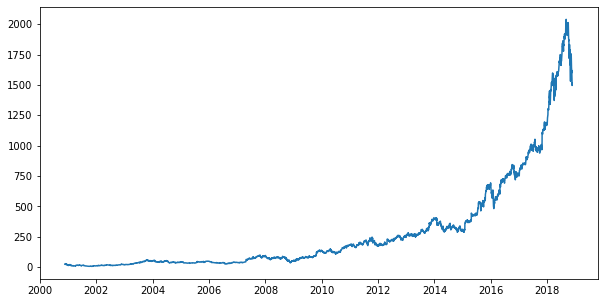

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) #create a new figure. Figsize sets the width and height in inches
plt.plot(dataset)
plt.show()

A time series is the crhonological recording of experimental obseravtions of a variable, such as price trends, stock market indices, spreads and unemployment rates


---
ratio is  (Y(t+1) - Y(t))/Y(t). This index is a percentage ratio and is called percentage change




In [25]:
DataPctChange = dataset.pct_change()
DataPctChange

,Close
Date,
2000-11-21,NaN
2000-11-22,0.038660
2000-11-24,0.148883
2000-11-27,-0.032397
2000-11-28,-0.106029
...,...
2018-11-15,0.012777
2018-11-16,-0.016073
2018-11-19,-0.050910


We will calculate the logarithm of returns. We have clear benefits:


*   log-normality: If we assume that prices are distributed log normally, then log(1+ri) is conveniently normally distributed

*   Approximate raw-log equality: When returns are very small result, log(1+r) is roughly equal to r
*   Logarithmic returns are additive over time


---

The benefit of using returns versus prices is normalization: measuring all variables in a comparable metric



In [12]:
import numpy as np
LogReturns = np.log(1+DataPctChange)
print(LogReturns.tail(10)) # tail function returns the last n rows

               Close
Date                
2018-11-08 -0.000330
2018-11-09 -0.024504
2018-11-12 -0.045140
2018-11-13 -0.003476
2018-11-14 -0.019913
2018-11-15  0.012696
2018-11-16 -0.016204
2018-11-19 -0.052251
2018-11-20 -0.011191
2018-11-21  0.014123


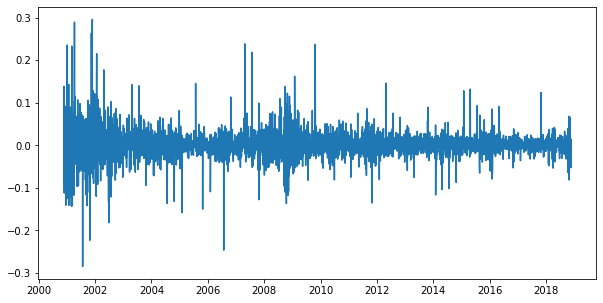

In [13]:
plt.figure(figsize=(10,5))
plt.plot(LogReturns)
plt.show()

r is a periodic rate of return


---
Formula: Stockprice(t) = Stockprice(t-1) * exp(r). This model was formulated by Louis Bachelier


---

The exponetial term is called daily return

---

The Geometric Brownian motion model is a stochastic process defined in the continuum in which the logarithm of the random variable over time follows a Brownian motion. This process is particularly important in the financial sector, particularly in the option pricing, as the Black-Scholes-Merton (BSM) model assumes that the price of the underlying asset follows such a process


---

The model is based on the following assumptions:


1.   The changes in stock price depend on the expected return over time and the effect of the constant volatility of the people who buy and sell at random over time have on that expected return

1.   The price is made up of two contributions: fixed drift rate and random stochastic variable

1.  The two contributions include the certainty of the movement and the uncertainty caused by volatility


---

drift = mean value of the log returns - (0.5*variance to the log returns). So the drift , we will use the expected rate of return-in other words, the rate we expect to change every day. This is known as the asset drift

---


The asset drift is the expected rate of change for price but it is not neccessarily the price of the rate that actually changes everyday; it is only the rate that is most likely to occur. This rate price is an unknown random number . We can determine the probabilities of using the rate based on the expected return, that is , the drift and historical volatility also known as standard deviation

---


r can assume any value being able to grow and decrease

---
Steps to create Monte Carlo simulation:


1.   Import the closing prices of an asset

1.   Find the periodic log returns

1.   Find the mean, variance and standard deviation of the log returns
2.   Calculate the drift as a mean of -0.5 variance


2.   Calculate a random stochastic offset as standard deviation * random term (B)


2.   Calculate the daily returns as e(drift * stdev * B)


1.   Calculate the stock price (t) as stock price (t-1) * daily returns







In [14]:
# mean() function computes the arithmetic mean along the specified axis and returns the average of the array elements
MeanLogReturns = np.array(LogReturns.mean())
# var() function computes the variance along the specified axis
VarLogReturns= np.array(LogReturns.var())
# std() function computes the standard deviation along the specified axis. A measure of the spread of a distribution of the array elements
StdevLogReturns = np.array(LogReturns.std())
# drift = mean - 0.5 * variance
Drift = MeanLogReturns - (0.5 * VarLogReturns)
print("Drift: ", Drift)

Drift:  [0.0004312]


In [125]:
NumberIntervals = 4592 # The numnber of obseravtions contained in the original dataset
Iterations = 30

In [126]:
# np.random.rand() function computes random values in a given shape; it creates an array of the given shape and populates it with random samples from a uniform distribution over [0,1)
# norm.ppf() function gives the value of the variate for which the cumulative probability has the given value

In [127]:
from scipy.stats import norm
B = norm.ppf(np.random.rand(NumberIntervals,Iterations))

The daily return measure the change in a stock'price as a percentage of the previous day's closing price 

---
A positive return means the stock has grown in value while the -ve return means it has lost value

---

To calculate daily returns, we will use this formula: exp(drift+stdev *B)


In [128]:
DailyReturns = np.exp(Drift +StdevLogReturns * B)

In [129]:
StockPrice0 = dataset.iloc[0] # stock price at 2000-06-05

In [130]:
StockPrice = np.zeros_like(DailyReturns)
# .zeros_like() function returns an array of zeros wit the same shape and type as a given array,(DailyReturns)

In [135]:
StockPrice[0]=  StockPrice0
StockPrice[0]

array([24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25,
       24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25,
       24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25, 24.25,
       24.25, 24.25, 24.25])

In [132]:
for t in range(1, NumberIntervals):

    StockPrice[t] = StockPrice[t - 1] * DailyReturns[t]
print(StockPrice)

[[2.42500000e+01 2.42500000e+01 2.42500000e+01 ... 2.42500000e+01
  2.42500000e+01 2.42500000e+01]
 [2.42745749e+01 2.44372417e+01 2.44762729e+01 ... 2.44594051e+01
  2.48992343e+01 2.41104996e+01]
 [2.28005016e+01 2.44430916e+01 2.38301196e+01 ... 2.44413224e+01
  2.37051963e+01 2.33090306e+01]
 ...
 [4.13107318e+02 7.13231578e+01 2.93838507e+02 ... 4.36481802e+03
  1.13382345e+02 3.38505650e+00]
 [4.19904069e+02 7.07158463e+01 2.89269029e+02 ... 4.41259379e+03
  1.16693584e+02 3.41105550e+00]
 [4.01203837e+02 6.92361920e+01 2.85098421e+02 ... 4.30981233e+03
  1.18603487e+02 3.27492788e+00]]


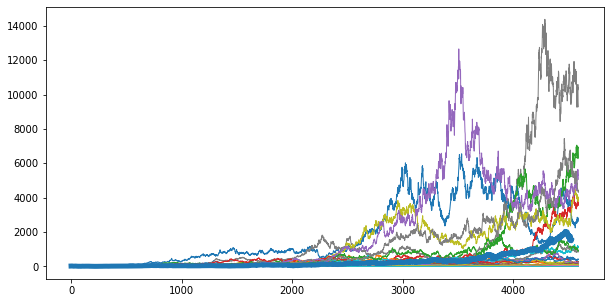

In [133]:
plt.figure(figsize=(10,5))

plt.plot(StockPrice,linewidth=1)   



df1 = np.array(dataset.iloc[:, 0:1])

#plt.subplot(1,2,1)
plt.plot(df1,linewidth=5)


plt.show()